# Plotly

[Plotly](https://plot.ly) je sada produktů pro interaktivní vizualizaci dat ve webovém prostředí. Grafy v Plotly jde tvořit v několika jazycích, my si samozřejmě ukážeme [Python API](https://plotly.com/python/).
<!-- TEASER_END -->

## Instalace

Pokud nemáte nainstalovaný Plotly, můžete si ho nainstalovat pomocí pipu, nejjednodušeji přímo z notebooku:


In [1]:
# odkomentujte pro instalaci knihovny plotly
# %pip install plotly

Případně pokud používáte `mamba` nebo `conda` instalaci:

In [2]:
# odkomentujte pro instalace plotly pomocí conda
# %conda install plotly

## Základní plotly graf

In [3]:
import plotly.graph_objects as go
import numpy as np

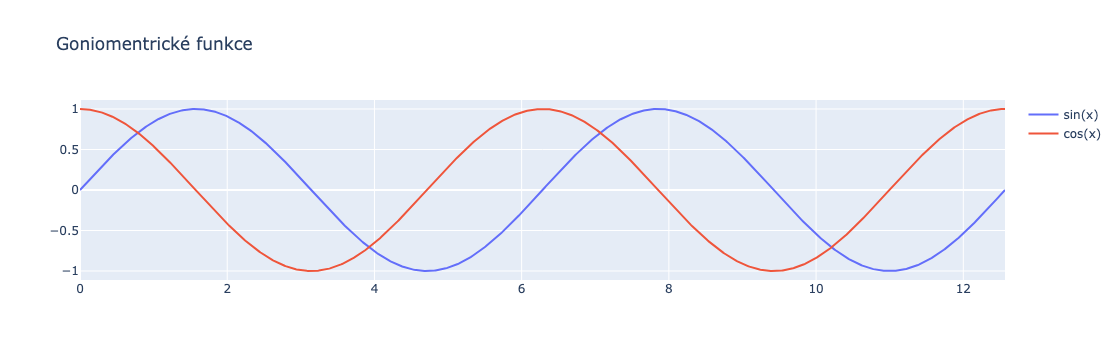

In [4]:
x = np.linspace(0, 4 * np.pi, 1_000)

fig = go.Figure(
    data=[go.Scatter(x=x, y=np.sin(x), name="sin(x)"), go.Scatter(x=x, y=np.cos(x), name="cos(x)")],
    layout=go.Layout(title=go.layout.Title(text="Goniomentrické funkce")),
)

fig.show()

Pokud vám vše funguje, zkuste s grafem pracovat interaktivně pomocí nástrojů v pravém horním rohu. Můžete přibližovat nebo posouvat, případně kliknutím na položky v legendě zobrazit/skrýt jednotlivé křivky.

## Plotly Express

`plotly.express` ještě více zjednodušuje vizualizace dat v tabulkovém formátu, především tedy data zpracovávaná pomocí knihovny [Pandas](https://pandas.pydata.org/), o které si povíme později.

In [5]:
import plotly.express as px

Obsahuje některé otovřené datové sady, např. z https://www.gapminder.org/

In [6]:
gapminder = px.data.gapminder()

Takto dostaneme data za jeden rok ve formě Pandas `DataFrame` "tabulky". Všimněte si především pojmenování sloupců - jména sloupců použijeme jako parametry pro `plotly.express` scatter plot.

In [7]:
gapminder.query("year==2007").head()

country continent  year  lifeExp       pop     gdpPercap iso_alpha  \
11  Afghanistan      Asia  2007   43.828  31889923    974.580338       AFG   
23      Albania    Europe  2007   76.423   3600523   5937.029526       ALB   
35      Algeria    Africa  2007   72.301  33333216   6223.367465       DZA   
47       Angola    Africa  2007   42.731  12420476   4797.231267       AGO   
59    Argentina  Americas  2007   75.320  40301927  12779.379640       ARG   

    iso_num  
11        4  
23        8  
35       12  
47       24  
59       32

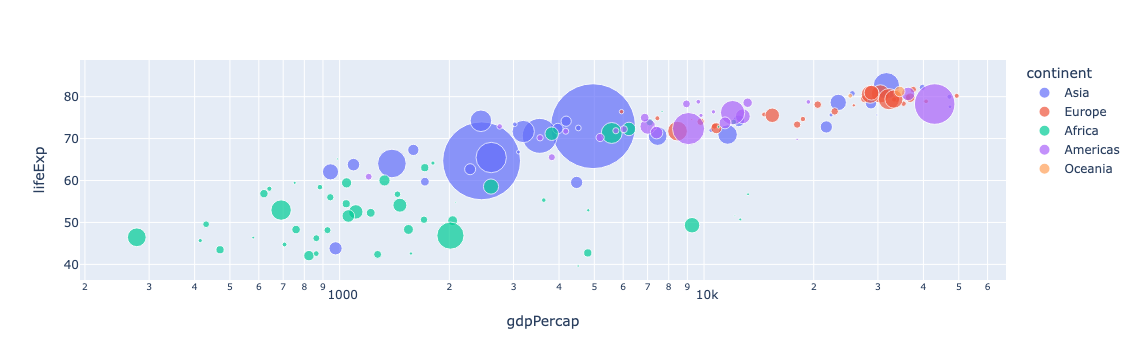

In [8]:
fig = px.scatter(gapminder.query("year==2007"), x="gdpPercap", y="lifeExp", size="pop", color="continent",
           hover_name="country", log_x=True, size_max=60)
fig.show()